# Linear regression

Linear regression using Google's TensorFlow API for machine learning. The following example shows how usual linear regression is done in the machine learning framework.

### Simple linear regression

A simple linear regression model in the statistician's language is: 

$$Y \sim \beta_0 + \beta_1 X,$$

where $X$ is the (single) independent variable and $Y$ is the dependent variable, and the $\beta$ are the fitting coefficients ($\beta_0$ is the intersection and $\beta_1$ is the slope).

This problem translates to the machine learner's language as

$$y = W x + b$$

where $x$ is the the (single) feature, $y$ is the prediction, $W$ is the so-called weight matrix (in this case it is a scalar since the problem is one-dimensional), and $b$ is the so-called bias. 

Oftentimes, there are multiple independent variables explaining the change in the dependent variable, or multiple features in machine learning language.

Now, import the Google's machine learning library, TensorFlow, for handling matrix operations and learning, and Python's numerical library, NumPy, for random number generation.

In [180]:
# Make plot appear in this notebook
%matplotlib inline

# Import Dataframe, numerical, machine learning and plotting libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Create 100 (x, y) data points in NumPy such that $$y = 0.1 x + 0.3$$ where the x are randomly chosen points around 0. These x data points will be fixed from now on for different variants of this linear regression problem. The fact that they are random is unimportant. I use the NumPy library's random generator here. 

In [181]:
n_data = 100 # Number of data points
np.random.seed(0) # Fix seed so that everyone has the same data
x_data = np.random.randn(n_data).astype(np.float32)
y_data = 0.1 * x_data + 0.3

Try to find values for W and b that compute $y = W x + b$
Obviously, W should be 0.1 and b 0.3, but let's see how Tensorflow
figures it out for us.

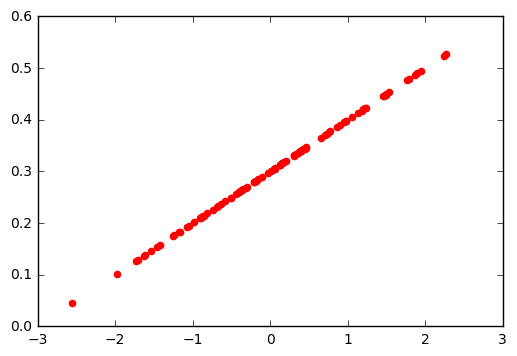

In [182]:
# Scatter plot of data
p1, ax1 = plt.subplots() 
color1 = (1,0,0)
ax1.scatter(x_data, y_data, facecolor=color1, edgecolor=color1)

Let's put the corresponding linear line across our data points.

In [183]:
def plotLine(p1, ax1, intersect, slope, color):
    # Get axis limits
    x_min1, x_max1 = ax1.get_xlim()
    y_min1, y_max1 = ax1.get_ylim()

    # Plot line
    y_min, y_max = intersect + slope*x_min1, intersect + slope*x_max1
    ax1.plot([x_min1, x_max1], [y_min, y_max], color=color)

    # Reset axis limits
    ax1.set_xlim([x_min1, x_max1])
    ax1.set_ylim([y_min1, y_max1])
    return p1, ax1

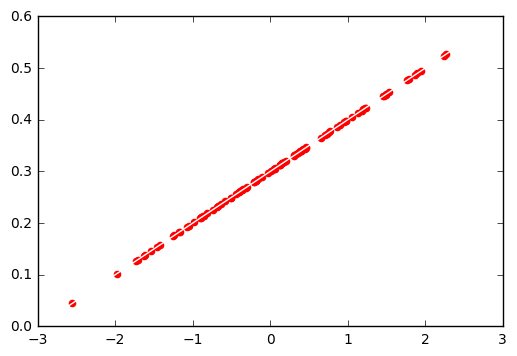

In [184]:
color = (1,1,1)
p1, ax1 = plotLine(p1, ax1, 0.3, 0.1, color)
p1

Let's initialize the weight with a random number between -1 and 1, and the bias 0. Here using Tensorflow's random number generator.

In [185]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

I'll plot our linear fit with this initial fitting variables, $W$ and $b$ below.

With this weight and bias, the predicted y will be:

In [186]:
y = W * x_data + b

Let's define the error of the fit by the sum of the square of the error on each training example, also called the loss function, and minimize this mean squared error loss function to get the $W$ weight and $b$ bias. 

Then we pick a gradient descent optimizer as our optimizer to find the minimum of the loss we just defined. The GradientDescentOptimizer is called with a specific learning rate 0.5 in this case.

We call on the optimizer the minimize function with the loss as parameter.

In [187]:
loss = tf.reduce_mean(tf.square(y - y_data))
learningRate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learningRate)
train = optimizer.minimize(loss)

Before starting, initialize the variables, meaning intialize $W$ weight and $b$ bias. We will 'run' this - initialization - first.

In [188]:
init = tf.initialize_all_variables()

Let's define a TensorFlow session and now actually run the initialization in this session.

In [189]:
sess = tf.Session()
sess.run(init)

Now, we do the actual fitting or learning step-by-step by running the above defined 'train' optimizer to minimize the loss function.

In [190]:
n_steps = 301 # Number of steps in the gradient descent towards the minimum of the loss function
n_gap = 100 # Plot every n-gap steps starting from the 1st step
for step in range(n_steps):
    sess.run(train)
    if step % n_gap == 0:
        Wstep = sess.run(W)
        bstep = sess.run(b)
        color = (1,0,0,0.9*step/n_steps+0.1)
        plotLine(p1,ax1,bstep,Wstep, color) # Successively plots better fitting lines
        print(step, bstep[0], Wstep[0], sess.run(loss))

# Learns best fit is W: [0.1], b: [0.3]

0 0.00726875 -0.938705 1.2219
100 0.277423 -0.0287364 0.017752
200 0.299033 0.0838264 0.000269467
300 0.300128 0.0979383 4.31782e-06


Note in the plot below how the ideal linear fit is approached as the gradient descent algorithm finds the minimum of the loss function. The darker red the hue, the better the fit.

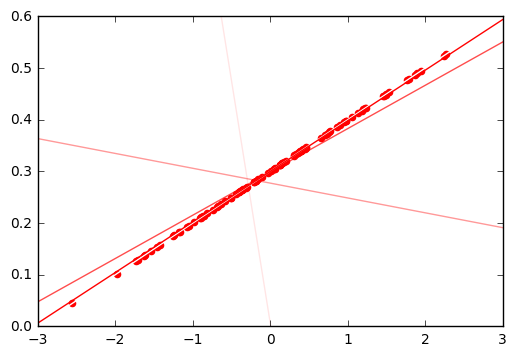

In [191]:
p1

In [179]:
sess.close()

In [283]:
#plot(sess.graph)